<a href="https://colab.research.google.com/github/colawhite/dsba/blob/main/demo/decision_tree_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial

Outline


*   What is Decision Tree (DT)
*   Decision Tree algorithm
*   Code/Example



**What is Decition Tree (DT)**

Let's start with the following example

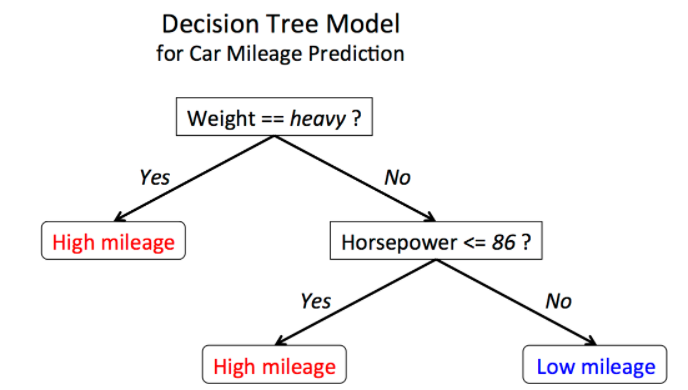

<pre>
Business Rule
If weight is heavy -> High mileage <br>
If weight is not heavy:
    If horsepower <= 86 -> High mileage
    If horsepower >  86 -> Low mileage
</pre>  


Decision Tree(DT) is a hierarchical if-else statements that split feature values in order to predict a label.



* Decision node <br>
> Decide how to split data
* Leaf node <br>
> Classification problem: use major vote for prediction <br>
> Regression problem : use average for prediction   





**How to split at decision node**

The most common metric used is Entropy, which represents uncertainty.<br>
   




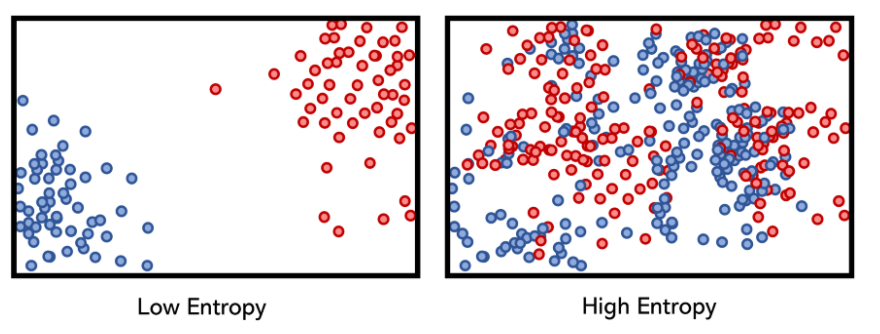

Mathematical expression

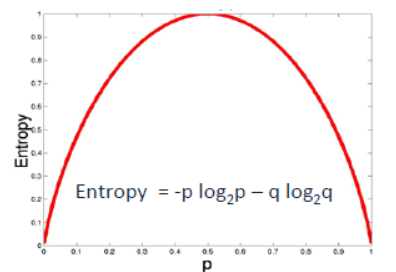

Pros
*   Makes no assumption to underlying data
*   Can be applied to binary or continuous
*   Handle outliers (still need to address missing value)
*   Naturally generate business rules (easy to understand)




Cons
*   Overfitting (solution: pruning)




# Program

In [10]:
import pandas as pd
import numpy as np
import collections
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt

In [2]:
data = load_iris()
print('Classes to predict: ', data.target_names)

Classes to predict:  ['setosa' 'versicolor' 'virginica']


In [3]:
#Extracting data attributes
X = data.data
### Extracting target/ class labels
y = data.target

print('Number of examples in the data:', X.shape[0])
print(f'Label distribution: {collections.Counter(y)}')

Number of examples in the data: 150
Label distribution: Counter({0: 50, 1: 50, 2: 50})


In [4]:
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)

In [5]:
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [6]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))


Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9473684210526315


In [13]:
text_representation = tree.export_text(clf,feature_names=data.feature_names)
print(text_representation)

|--- petal length (cm) <= 2.35
|   |--- class: 0
|--- petal length (cm) >  2.35
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 5.05
|   |   |   |--- sepal length (cm) <= 4.95
|   |   |   |   |--- petal length (cm) <= 3.90
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  3.90
|   |   |   |   |   |--- class: 2
|   |   |   |--- sepal length (cm) >  4.95
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.05
|   |   |   |--- sepal length (cm) <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  6.05
|   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  6.05
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



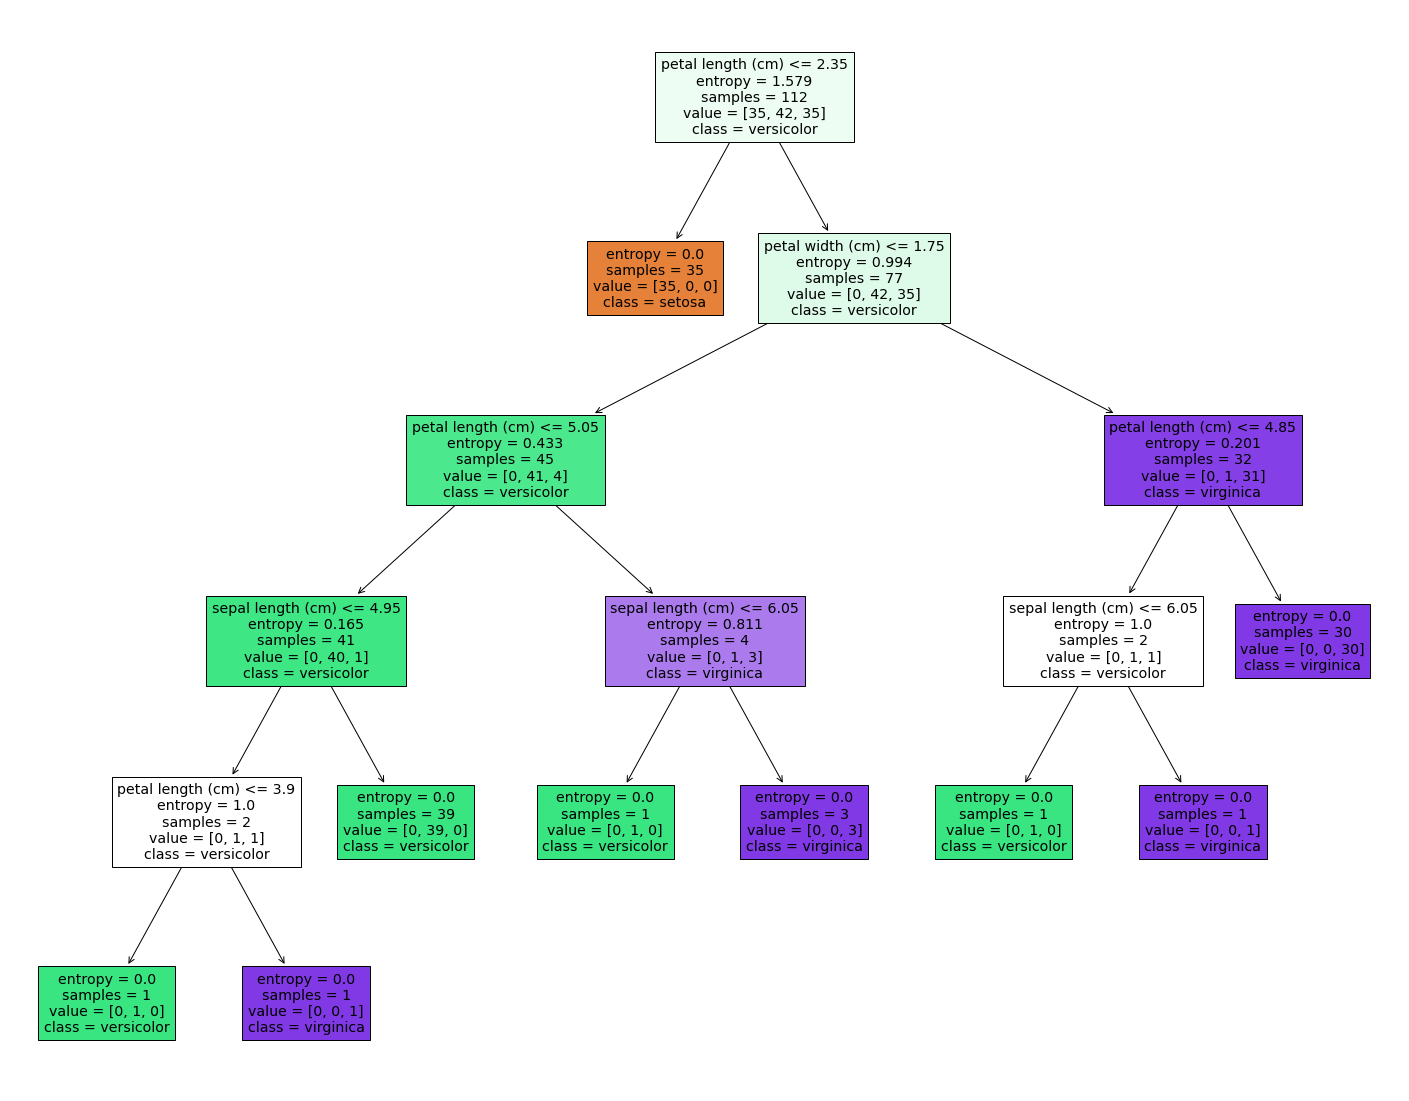

In [14]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,feature_names=data.feature_names,class_names=data.target_names,filled=True)

In [ ]:
# Let's try to increase min_samples_leaf to address overfitting
# if overfitting happens, by increasing min_samples_leaf, we expect to see decreased accuracy on train data, and increased 
clf1 = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=5)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf1.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=clf1.predict(X_test)))

Accuracy Score on train data:  0.9642857142857143
Accuracy Score on test data:  1.0
